In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gurobipy
import numpy as np
%pip install pypsa[highs] "xarray>=2023.8.0" Cartopy highspy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from gurobipy import *
from add_country import *

In [4]:
import pypsa
import pandas as pd
from dataclasses import dataclass

In [5]:
add_scandinavia(network, climatic_year, time_horizon_in_hours)

In [6]:
add_germany(network, climatic_year, time_horizon_in_hours)
add_iberian(network, climatic_year, time_horizon_in_hours)
add_poland(network, climatic_year, time_horizon_in_hours)
add_france(network, climatic_year, time_horizon_in_hours)

In [7]:
network.generators

attribute                                            bus control type  \
Generator                                                               
scandinaviaFossils                           Scandinavia      PQ        
scandinaviaBioEnergies                       Scandinavia      PQ        
scandinaviaHydroelectric                     Scandinavia      PQ        
scandinaviaWind_on_shore                     Scandinavia      PQ        
scandinaviaWind_off_shore                    Scandinavia      PQ        
scandinaviaNuclear                           Scandinavia      PQ        
scandinaviaSolar                             Scandinavia      PQ        
scandinaviaFailure                           Scandinavia      PQ        
GER-Hydro_ROR                                    Germany      PQ        
GER-WindOnshore                                  Germany      PQ        
GER-WindOffshore                                 Germany      PQ        
GER-Solar                                        Germany      PQ        
GER-Coal                                         Germany      PQ        
GER-Biomass                                      Germany      PQ        
GER-CCGT                                         Germany      PQ        
GER-Oil                                          Germany      PQ        
GER-Underproduction                              Germany      PQ        
iberianFossils                         Iberian_Peninsula      PQ        
iberianBioEnergies                     Iberian_Peninsula      PQ        
iberianHydroelectric                   Iberian_Peninsula      PQ        
iberianWind_on_shore                   Iberian_Peninsula      PQ        
iberianWind_off_shore                  Iberian_Peninsula      PQ        
iberianNuclear                         Iberian_Peninsula      PQ        
iberianSolar                           Iberian_Peninsula      PQ        
iberianFailure                         Iberian_Peninsula      PQ        
poland_Hydro - Run of River (Turbine)             poland      PQ        
poland_Wind Onshore                               poland      PQ        
poland_Wind Offshore                              poland      PQ        
poland_Solar (Photovoltaic)                       poland      PQ        
poland_Biofuel                                    poland      PQ        
poland_Others renewable                           poland      PQ        
polandFailure                                     poland      PQ        
FranceNuclear                                     France      PQ        
FranceWindOnshore                                 France      PQ        
FranceWindOffshore                                France      PQ        
FranceSolar                                       France      PQ        
FranceOCGT                                        France      PQ        
FranceBioEnergies                                 France      PQ        
FranceHydro                                       France      PQ        
FranceFailure                                     France      PQ        

attribute                                  p_nom  p_nom_extendable  p_nom_min  \
Generator                                                                       
scandinaviaFossils                        5000.0             False        0.0   
scandinaviaBioEnergies                   11000.0             False        0.0   
scandinaviaHydroelectric                 57000.0             False        0.0   
scandinaviaWind_on_shore                 43000.0             False        0.0   
scandinaviaWind_off_shore                17000.0             False        0.0   
scandinaviaNuclear                       11000.0             False        0.0   
scandinaviaSolar                         19000.0             False        0.0   
scandinaviaFailure                      100000.0             False        0.0   
GER-Hydro_ROR                             3933.0             False        0.0   
GER-WindOnshore                         11

In [8]:
network

PyPSA Network
Components:
 - Bus: 5
 - Carrier: 19
 - Generator: 40
 - Load: 9
 - StorageUnit: 6
 - Store: 11
Snapshots: 8760

In [9]:
links_list = [
    {"name" : "Link_SCA_Curtailment", "bus0" : "Scandinavia", "bus1" : "Curtailment", "p_nom" : 700000, "efficiency" : 0.95},
    {"name" : "Link_SCA_Germany", "bus0":"Scandinavia", "bus1":"Germany", "p_nom":7415, "efficiency":0.95},
    {"name" : "Link_SCA_Poland", "bus0":"Scandinavia", "bus1":"poland", "p_nom":600, "efficiency":0.95},
    #{"name" : "Link_SCA_Benelux", "bus0":"Scandinavia", "bus1":"Benelux", "p_nom":1400, "efficiency":0.95},
    #{"name" : "Link_Benelux_SCA", "bus0":"Benelux", "bus1":"Scandinavia", "p_nom":1400, "efficiency":0.95},
    {"name" : "Link_Poland_SCA", "bus0":"poland", "bus1":"Scandinavia", "p_nom":600, "efficiency":0.95},
    {"name" : "Link_Germany_SCA", "bus0":"Germany", "bus1":"Scandinavia", "p_nom":2000, "efficiency":0.95},
    {"name" : "Link_France_Germany", "bus0":"France", "bus1":"Germany", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_France", "bus0":"Germany", "bus1":"France", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_Poland", "bus0":"Germany", "bus1":"poland", "p_nom":3400, "efficiency":0.95},
    {"name" : "Link_Poland_Germany", "bus0":"poland", "bus1":"Germany", "p_nom":3400, "efficiency":0.95},
    #{"name" : "Link_Germany_Benelux", "bus0":"Germany", "bus1":"Benelux", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_Germany", "bus0":"Benelux", "bus1":"Germany", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_France", "bus0":"Benelux", "bus1":"France", "p_nom":4680, "efficiency":0.95},
    #{"name" : "Link_France_Benelux", "bus0":"France", "bus1":"Benelux", "p_nom":4680, "efficiency":0.95},
    {"name" : "Link_France_Iberian", "bus0":"France", "bus1":"Iberian_Peninsula", "p_nom":5000, "efficiency":0.95},
    {"name" : "Link_Iberian_France", "bus0":"Iberian_Peninsula", "bus1":"France", "p_nom":5000, "efficiency":0.95},
]

for links in links_list:
    network.add("Link", **links,)

(<matplotlib.collections.PatchCollection at 0x7fbd60f4f010>,
 <matplotlib.collections.LineCollection at 0x7fbd60f4fb80>)

/Users/alexandrerebiere/Documents/anaconda3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



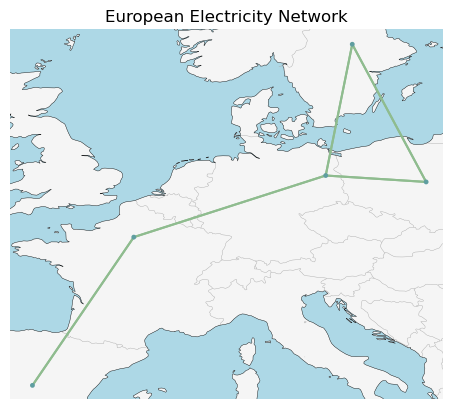

In [10]:
network.plot(
    title="European Electricity Network",
    color_geomap=True,
    jitter=0.3,
)

In [11]:
result = network.optimize(solver_name="gurobi")
print(result)   

Index(['Link_SCA_Curtailment'], dtype='object', name='Link')
Index(['scandinaviaCurtailment-load', 'iberianCurtailment-load',
       'polandCurtailment-load', 'FranceCurtailment-load'],
      dtype='object', name='Load')
Index(['Link_SCA_Curtailment'], dtype='object', name='Link')
Index(['scandinaviaCurtailment-load', 'iberianCurtailment-load',
       'polandCurtailment-load', 'FranceCurtailment-load'],
      dtype='object', name='Load')
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy.gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2024-11-21


INFO:gurobipy.gurobipy:Academic license - for non-commercial use only - expires 2024-11-21
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|█████████████████████████████████████████| 3/3 [00:00<00:00, 15.45it/s]
INFO:linopy.io: Writing time: 13.56s


Read LP format model from file /private/var/folders/ms/4_rjwj4n1h1gg3k7zdvmsv5m0000gn/T/linopy-problem-pw7asz9_.lp


INFO:gurobipy.gurobipy:Read LP format model from file /private/var/folders/ms/4_rjwj4n1h1gg3k7zdvmsv5m0000gn/T/linopy-problem-pw7asz9_.lp


Reading time = 4.21 seconds


INFO:gurobipy.gurobipy:Reading time = 4.21 seconds


obj: 1979761 rows, 1086240 columns, 4124986 nonzeros


INFO:gurobipy.gurobipy:obj: 1979761 rows, 1086240 columns, 4124986 nonzeros


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])


INFO:gurobipy.gurobipy:Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])


INFO:gurobipy.gurobipy:


CPU model: Intel(R) Core(TM) i5-8259U CPU @ 2.30GHz


INFO:gurobipy.gurobipy:CPU model: Intel(R) Core(TM) i5-8259U CPU @ 2.30GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy.gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy.gurobipy:


Optimize a model with 1979761 rows, 1086240 columns and 4124986 nonzeros


INFO:gurobipy.gurobipy:Optimize a model with 1979761 rows, 1086240 columns and 4124986 nonzeros


Model fingerprint: 0x77da0c2f


INFO:gurobipy.gurobipy:Model fingerprint: 0x77da0c2f


Variable types: 797160 continuous, 289080 integer (289080 binary)


INFO:gurobipy.gurobipy:Variable types: 797160 continuous, 289080 integer (289080 binary)


Coefficient statistics:


INFO:gurobipy.gurobipy:Coefficient statistics:


  Matrix range     [9e-01, 1e+05]


INFO:gurobipy.gurobipy:  Matrix range     [9e-01, 1e+05]


  Objective range  [5e+00, 1e+07]


INFO:gurobipy.gurobipy:  Objective range  [5e+00, 1e+07]


  Bounds range     [1e+00, 1e+00]


INFO:gurobipy.gurobipy:  Bounds range     [1e+00, 1e+00]


  RHS range        [1e+00, 1e+06]


INFO:gurobipy.gurobipy:  RHS range        [1e+00, 1e+06]


Presolve removed 1853393 rows and 808672 columns (presolve time = 5s) ...


INFO:gurobipy.gurobipy:Presolve removed 1853393 rows and 808672 columns (presolve time = 5s) ...


Presolve removed 1855660 rows and 834274 columns (presolve time = 14s) ...


INFO:gurobipy.gurobipy:Presolve removed 1855660 rows and 834274 columns (presolve time = 14s) ...


Presolve removed 1862747 rows and 834274 columns


INFO:gurobipy.gurobipy:Presolve removed 1862747 rows and 834274 columns


Presolve time: 14.08s


INFO:gurobipy.gurobipy:Presolve time: 14.08s


Presolved: 117014 rows, 251966 columns, 953900 nonzeros


INFO:gurobipy.gurobipy:Presolved: 117014 rows, 251966 columns, 953900 nonzeros


Variable types: 209945 continuous, 42021 integer (41904 binary)


INFO:gurobipy.gurobipy:Variable types: 209945 continuous, 42021 integer (41904 binary)


Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy.gurobipy:Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy.gurobipy:Showing barrier log only...


INFO:gurobipy.gurobipy:


Root barrier log...


INFO:gurobipy.gurobipy:Root barrier log...


INFO:gurobipy.gurobipy:


Ordering time: 0.17s


INFO:gurobipy.gurobipy:Ordering time: 0.17s


INFO:gurobipy.gurobipy:


Barrier statistics:


INFO:gurobipy.gurobipy:Barrier statistics:


 AA' NZ     : 1.469e+06


INFO:gurobipy.gurobipy: AA' NZ     : 1.469e+06


 Factor NZ  : 4.815e+06 (roughly 180 MB of memory)


INFO:gurobipy.gurobipy: Factor NZ  : 4.815e+06 (roughly 180 MB of memory)


 Factor Ops : 3.814e+08 (less than 1 second per iteration)


INFO:gurobipy.gurobipy: Factor Ops : 3.814e+08 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy.gurobipy: Threads    : 1


INFO:gurobipy.gurobipy:


                  Objective                Residual


INFO:gurobipy.gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy.gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0  -2.45563267e+15 -4.39701017e+18  2.22e+05 1.49e+09  4.26e+13    18s


INFO:gurobipy.gurobipy:   0  -2.45563267e+15 -4.39701017e+18  2.22e+05 1.49e+09  4.26e+13    18s


   1  -6.93854924e+14 -2.20674834e+18  6.85e+04 1.37e+09  1.51e+13    18s


INFO:gurobipy.gurobipy:   1  -6.93854924e+14 -2.20674834e+18  6.85e+04 1.37e+09  1.51e+13    18s


   2  -4.80280478e+13 -7.84276871e+17  2.04e+04 2.17e+08  4.40e+12    18s


INFO:gurobipy.gurobipy:   2  -4.80280478e+13 -7.84276871e+17  2.04e+04 2.17e+08  4.40e+12    18s


   3   1.93342470e+14 -2.33033486e+17  2.00e+03 2.87e+06  6.56e+11    19s


INFO:gurobipy.gurobipy:   3   1.93342470e+14 -2.33033486e+17  2.00e+03 2.87e+06  6.56e+11    19s


   4   1.93796533e+14 -8.69354644e+16  1.04e+03 5.41e+05  2.30e+11    19s


INFO:gurobipy.gurobipy:   4   1.93796533e+14 -8.69354644e+16  1.04e+03 5.41e+05  2.30e+11    19s


   5   1.70908297e+14 -4.02877425e+16  5.50e+02 1.34e-05  1.01e+11    20s


INFO:gurobipy.gurobipy:   5   1.70908297e+14 -4.02877425e+16  5.50e+02 1.34e-05  1.01e+11    20s


   6   9.45411325e+13 -1.27872016e+16  1.29e+02 5.72e-06  2.81e+10    20s


INFO:gurobipy.gurobipy:   6   9.45411325e+13 -1.27872016e+16  1.29e+02 5.72e-06  2.81e+10    20s


   7   5.66567159e+13 -3.10598613e+15  2.66e+01 5.25e-06  6.48e+09    20s


INFO:gurobipy.gurobipy:   7   5.66567159e+13 -3.10598613e+15  2.66e+01 5.25e-06  6.48e+09    20s


   8   3.90665401e+13 -5.87065658e+14  8.10e+00 4.77e-06  1.30e+09    21s


INFO:gurobipy.gurobipy:   8   3.90665401e+13 -5.87065658e+14  8.10e+00 4.77e-06  1.30e+09    21s


   9   2.90839314e+13 -2.76676686e+14  3.63e+00 5.72e-06  6.24e+08    21s


INFO:gurobipy.gurobipy:   9   2.90839314e+13 -2.76676686e+14  3.63e+00 5.72e-06  6.24e+08    21s


  10   2.14873608e+13 -4.75064313e+13  8.63e-01 5.25e-06  1.39e+08    21s


INFO:gurobipy.gurobipy:  10   2.14873608e+13 -4.75064313e+13  8.63e-01 5.25e-06  1.39e+08    21s


  11   1.79593092e+13  8.18363957e+11  2.57e-01 3.90e-06  3.37e+07    22s


INFO:gurobipy.gurobipy:  11   1.79593092e+13  8.18363957e+11  2.57e-01 3.90e-06  3.37e+07    22s


  12   1.67286893e+13  9.00536488e+12  8.56e-02 2.04e-06  1.48e+07    22s


INFO:gurobipy.gurobipy:  12   1.67286893e+13  9.00536488e+12  8.56e-02 2.04e-06  1.48e+07    22s


  13   1.64836629e+13  1.24054738e+13  5.80e-02 1.39e-06  7.79e+06    22s


INFO:gurobipy.gurobipy:  13   1.64836629e+13  1.24054738e+13  5.80e-02 1.39e-06  7.79e+06    22s


  14   1.62944908e+13  1.36309018e+13  3.90e-02 1.06e-06  5.08e+06    22s


INFO:gurobipy.gurobipy:  14   1.62944908e+13  1.36309018e+13  3.90e-02 1.06e-06  5.08e+06    22s


  15   1.60875932e+13  1.47151020e+13  1.93e-02 4.48e-07  2.61e+06    23s


INFO:gurobipy.gurobipy:  15   1.60875932e+13  1.47151020e+13  1.93e-02 4.48e-07  2.61e+06    23s


INFO:gurobipy.gurobipy:


Barrier performed 15 iterations in 22.85 seconds (13.34 work units)


INFO:gurobipy.gurobipy:Barrier performed 15 iterations in 22.85 seconds (13.34 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy.gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy.gurobipy:


Concurrent spin time: 0.04s


INFO:gurobipy.gurobipy:Concurrent spin time: 0.04s


INFO:gurobipy.gurobipy:


Solved with dual simplex


INFO:gurobipy.gurobipy:Solved with dual simplex


INFO:gurobipy.gurobipy:


Root simplex log...


INFO:gurobipy.gurobipy:Root simplex log...


INFO:gurobipy.gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy.gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   92772    1.5866090e+13   0.000000e+00   0.000000e+00     23s


INFO:gurobipy.gurobipy:   92772    1.5866090e+13   0.000000e+00   0.000000e+00     23s


INFO:gurobipy.gurobipy:


Root relaxation: objective 1.586609e+13, 92772 iterations, 7.25 seconds (3.69 work units)


INFO:gurobipy.gurobipy:Root relaxation: objective 1.586609e+13, 92772 iterations, 7.25 seconds (3.69 work units)


INFO:gurobipy.gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy.gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy.gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy.gurobipy:


     0     0 1.5866e+13    0  871          - 1.5866e+13      -     -   27s


INFO:gurobipy.gurobipy:     0     0 1.5866e+13    0  871          - 1.5866e+13      -     -   27s


H    0     0                    1.589877e+13 1.5866e+13  0.21%     -   27s


INFO:gurobipy.gurobipy:H    0     0                    1.589877e+13 1.5866e+13  0.21%     -   27s


H    0     0                    1.589860e+13 1.5866e+13  0.20%     -   28s


INFO:gurobipy.gurobipy:H    0     0                    1.589860e+13 1.5866e+13  0.20%     -   28s


     0     0 1.5866e+13    0  220 1.5899e+13 1.5866e+13  0.20%     -   30s


INFO:gurobipy.gurobipy:     0     0 1.5866e+13    0  220 1.5899e+13 1.5866e+13  0.20%     -   30s


H    0     0                    1.586733e+13 1.5866e+13  0.01%     -   31s


INFO:gurobipy.gurobipy:H    0     0                    1.586733e+13 1.5866e+13  0.01%     -   31s


INFO:gurobipy.gurobipy:


Cutting planes:


INFO:gurobipy.gurobipy:Cutting planes:


  Implied bound: 51


INFO:gurobipy.gurobipy:  Implied bound: 51


  MIR: 265


INFO:gurobipy.gurobipy:  MIR: 265


  Flow cover: 460


INFO:gurobipy.gurobipy:  Flow cover: 460


  Relax-and-lift: 152


INFO:gurobipy.gurobipy:  Relax-and-lift: 152


INFO:gurobipy.gurobipy:


Explored 1 nodes (96117 simplex iterations) in 31.48 seconds (20.10 work units)


INFO:gurobipy.gurobipy:Explored 1 nodes (96117 simplex iterations) in 31.48 seconds (20.10 work units)


Thread count was 8 (of 8 available processors)


INFO:gurobipy.gurobipy:Thread count was 8 (of 8 available processors)


INFO:gurobipy.gurobipy:


Solution count 3: 1.58673e+13 1.58986e+13 1.58988e+13 


INFO:gurobipy.gurobipy:Solution count 3: 1.58673e+13 1.58986e+13 1.58988e+13 


INFO:gurobipy.gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy.gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 1.586732898274e+13, best bound 1.586617740730e+13, gap 0.0073%


INFO:gurobipy.gurobipy:Best objective 1.586732898274e+13, best bound 1.586617740730e+13, gap 0.0073%
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1086240 primals, 0 duals
Objective: 1.59e+13
Solver model: available
Solver message: 2



('ok', 'optimal')


<Axes: xlabel='Generator', ylabel='GW'>

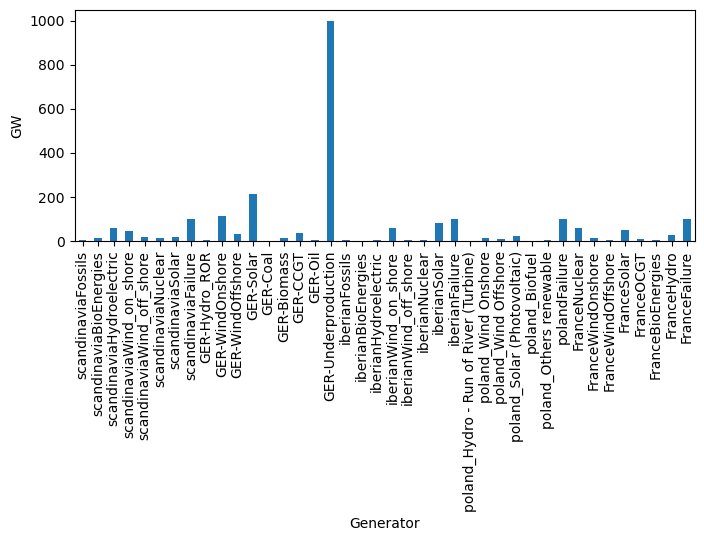

In [12]:
network.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))

<Axes: xlabel='snapshot', ylabel='GW'>

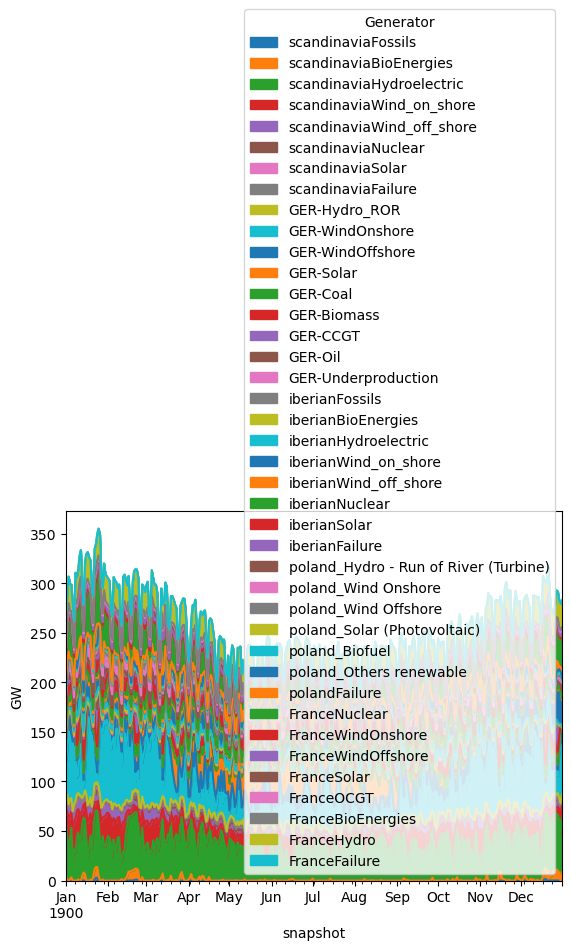

In [17]:
network.generators_t.p['scandinaviaFailure'] = network.generators_t.p['scandinaviaFailure'].clip(lower=0)
network.generators_t.p['GER-Underproduction'] = network.generators_t.p['GER-Underproduction'].clip(lower=0)
network.generators_t.p['GER-CCGT'] = network.generators_t.p['GER-CCGT'].clip(lower=0)
network.generators_t.p['iberianFailure'] = network.generators_t.p['iberianFailure'].clip(lower=0)
network.generators_t.p['polandFailure'] = network.generators_t.p['polandFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceFailure'] = network.generators_t.p['FranceFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)

network.generators_t.p.resample('D').mean().div(1e3).plot.area(subplots=False, ylabel="GW")

array([<Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes:

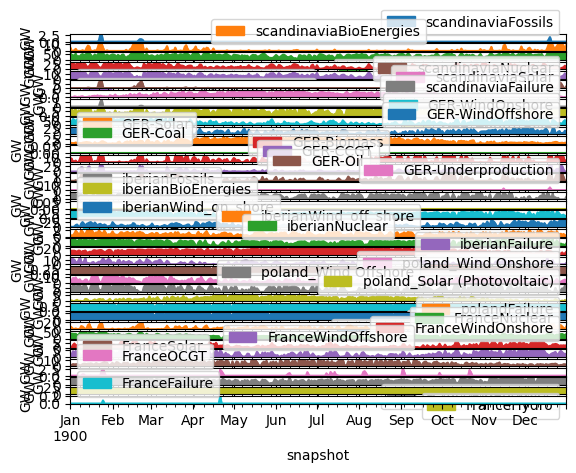

In [18]:
network.generators_t.p.resample('D').mean().div(1e3).plot.area(subplots=True, ylabel="GW")